In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

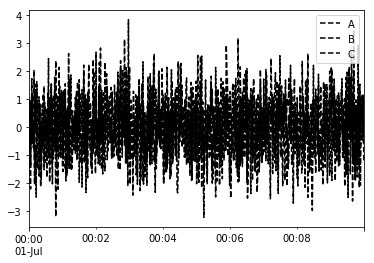

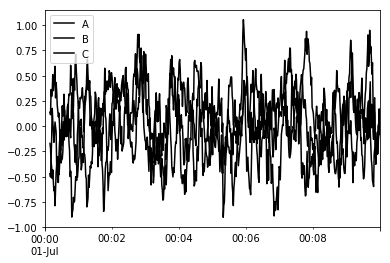

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=2,adjust=True,span=15).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,-0.594467,-0.364821,-0.705410
2016-07-01 00:00:02,-1.090864,-0.513984,-0.079420
2016-07-01 00:00:03,-1.425504,-0.781741,-0.245523
2016-07-01 00:00:04,-0.940765,-0.381771,-0.262139
2016-07-01 00:00:05,-0.860889,-0.038234,0.190236
2016-07-01 00:00:06,-0.458258,0.092358,0.191983
2016-07-01 00:00:07,-0.468737,-0.030908,0.058591
2016-07-01 00:00:08,-0.409349,-0.005197,-0.081705
2016-07-01 00:00:09,-0.293397,-0.128349,0.279906


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,-0.328794,0.285723,0.092786,-1.391408
2016-06-07,-0.832158,0.694425,0.720882,-2.342557
2016-06-08,-2.030221,-0.996452,-0.655763,-0.213007
2016-06-09,-1.989154,0.111020,0.468565,-0.702074
2016-06-10,0.472789,1.248587,1.145530,0.283054


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000238067CE828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000238068D0E10>], dtype=object)

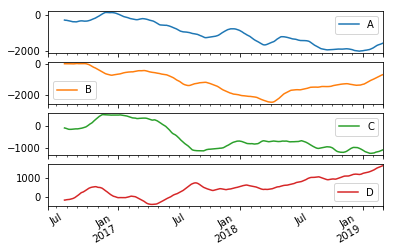

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.167008,0.730083,1.559193,0.729847


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.744873,0.632936,0.453227,-2.562686
2016-06-08,-1.560306,0.416523,0.354787,-3.024115
2016-06-09,-2.465311,0.336071,0.422708,-3.430347
2016-06-10,-2.913756,0.537518,0.692566,-3.617476


In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# more
# When might one vs. the other be appropriate?
# if you are interested in the entire time window use expanding
# if you are only interested in a specific window use rolling window

In [12]:
# EWMA
# Why use EWMA?
# EWMA assign heavier weighting to more current data

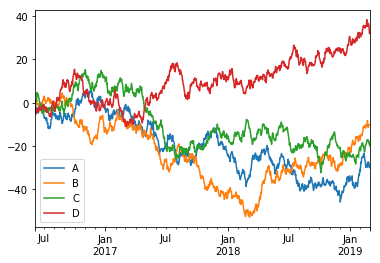

In [17]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate
df.head()
df.plot()

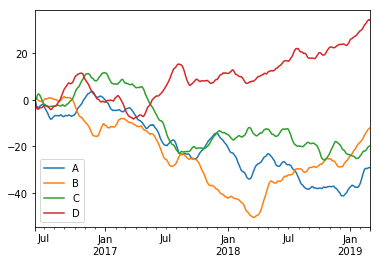

In [19]:
df1 = df.ewm(span=30).mean()
df1.plot()